In [16]:
import pandas as pd
import os
from common import data_folder_path
import matplotlib.pyplot as plt


In [17]:
data_file = 'train.csv'
df = pd.read_csv(os.path.join(data_folder_path,data_file))
df['datetime'] = pd.to_datetime(df['datetime'])
df['Time of Day']=df['datetime'].dt.hour

In [18]:
#based on this https://seasonsyear.com/Estonia
def get_season(row):
    month = row.month
    if month in [12,1,2,3]: #'Snow starts to fall at around middle of December and remains to mid-March. By the beginning of December temperature of water finally drops below zero (0C) thus the ice begins to appear by the coasts.'
        return 'Winter'
    elif month in [4,5]:
        return 'Spring'
    elif month in [6,7,8]:
        return 'Summer' #'Climate of the summer months: ... June ... July ... August'
    else:
        return 'Autumn' #'In Estonia coming of actual Autumn is almost simultaneous to calendar change of seasons.'

df['Season'] = df['datetime'].apply(get_season)
df['Season'].value_counts()#.plot(kind='bar')
assert df['Season'].value_counts().sum()==df.shape[0] #sanity check that all rows have a season

<Axes: title={'center': 'Energy Production by Season'}, xlabel='Time of Day'>

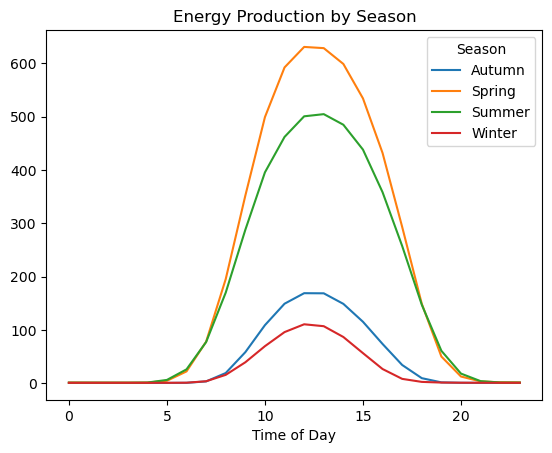

In [19]:
df[df['is_consumption']==0].groupby(['Season','Time of Day'])['target'].mean().unstack().transpose().plot(kind='line',title='Energy Production by Season')

<Axes: title={'center': 'Energy Consumption by Season'}, xlabel='Time of Day'>

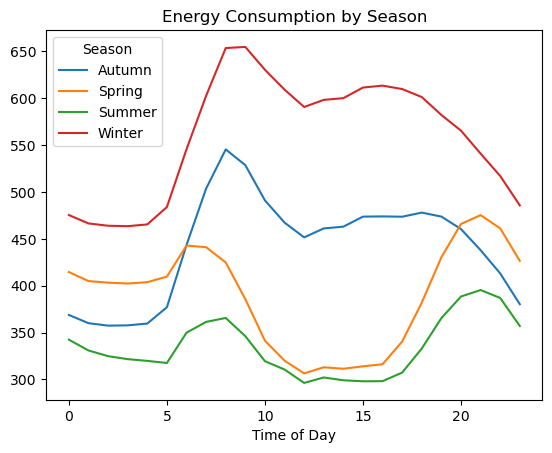

In [20]:
df[df['is_consumption']==1].groupby(['Season','Time of Day'])['target'].mean().unstack().transpose().plot(kind='line',title='Energy Consumption by Season')

<Axes: title={'center': 'Business Energy Consumption by Season'}, xlabel='Time of Day'>

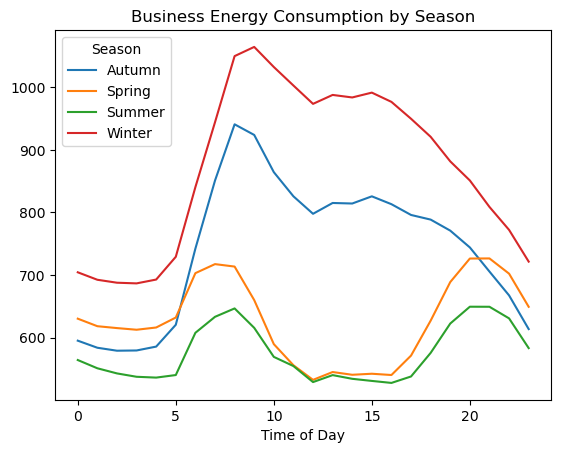

In [21]:
df[(df['is_business']==1)&(df['is_consumption']==1)].groupby(['Season','Time of Day'])['target'].mean().unstack().transpose().plot(kind='line',title='Business Energy Consumption by Season')

<Axes: title={'center': 'Non-Business Energy Consumption by Season'}, xlabel='Time of Day'>

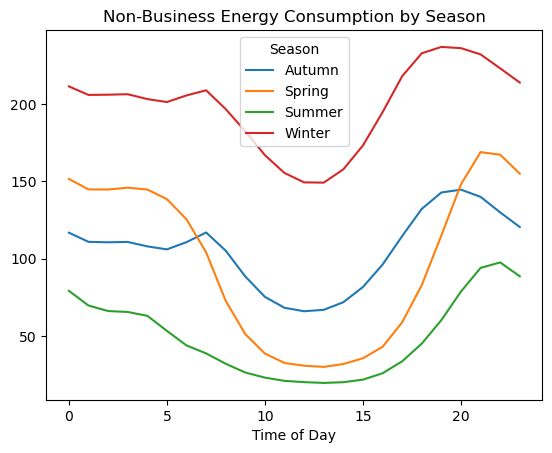

In [22]:
df[(df['is_business']==0)&(df['is_consumption']==1)].groupby(['Season','Time of Day'])['target'].mean().unstack().transpose().plot(kind='line',title='Non-Business Energy Consumption by Season')

<Axes: title={'center': 'Business Energy Production by Season'}, xlabel='Time of Day'>

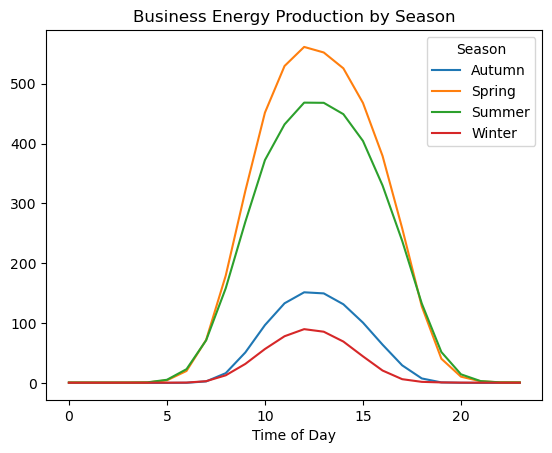

In [23]:
df[(df['is_business']==1)&(df['is_consumption']==0)].groupby(['Season','Time of Day'])['target'].mean().unstack().transpose().plot(kind='line',title='Business Energy Production by Season')

<Axes: title={'center': 'Non-Business Energy Production by Season'}, xlabel='Time of Day'>

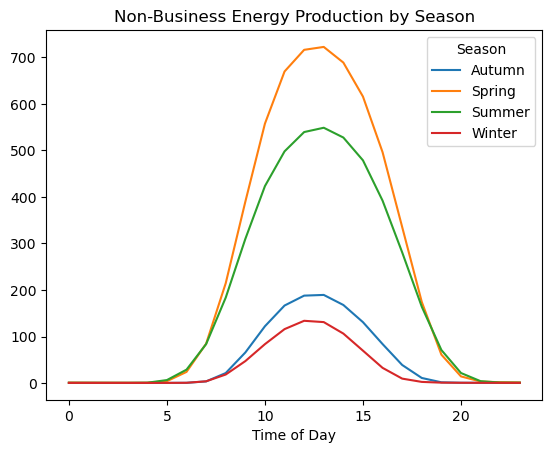

In [24]:
df[(df['is_business']==0)&(df['is_consumption']==0)].groupby(['Season','Time of Day'])['target'].mean().unstack().transpose().plot(kind='line',title='Non-Business Energy Production by Season')

In [25]:
print(df[df['is_business']==1].shape)
print(df[df['is_business']==0].shape)

(1083504, 11)
(934848, 11)


In [ ]:
#TL;DR businesses consume more energy than non-businesses, and therefore suck
#business energy comsumption peaks in mid-day, non-business in morning/evening
#both business and non-business energy production peaks in mid-day

#energy production is much higher in spring and summer
#energy consumption for businesses is much higher in winter and autumn
#nergy consumption for non-businesses is higher mid-day in winter and autumn, but higher in morning/evening in summer than in autumn (but still highest in morning/evening in winter)